In [1]:
%matplotlib inline

import numpy as np # 배열 및 수학 연산
import matplotlib.pyplot as plt # 데이터 시각화 
from mpl_toolkits import mplot3d # 3D 플롯 생성 

In [2]:
# 네이티브 한 cost function
X = list(range(10))
Y = [1, 1, 3, 4, 5, 7, 8, 9, 9, 10]

class H(): # hypothesis
  def __init__(self, w): # 생성자. w가 input 
    self.w = w
  def forward(self, x): # H를 호출할 때 집어넣은 w를 forward(여기)에 오는 인자에 곱해서 반환 
    return self.w * x
  
def cost(h, X, Y): # cost function
  error = 0
  for i in range(len(X)):
    error += (h.forward(X[i]) - Y[i])**2 # 일반적인 비용함수 
  error = error / len(X)
  return error
h = H(4)
cost(h,X,Y)

221.1

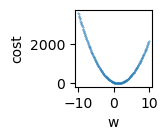

In [3]:
list_w = []
list_c = []
for i in range(-100, 100):
  w = i * 0.1
  h = H(w)
  c = cost(h,X,Y)
  list_w.append(w)
  list_c.append(c)
plt.figure(figsize=(1,1))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=0.1) # input들의 길이가 같아야 함  

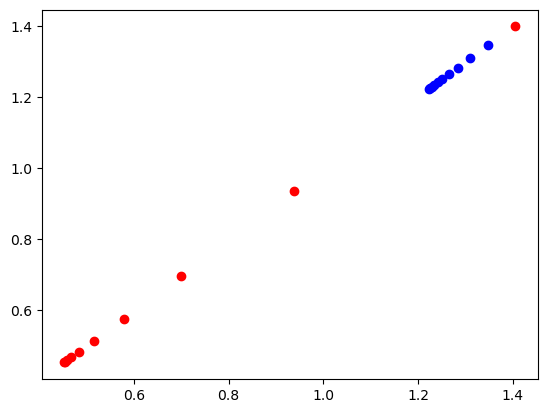

In [ ]:
def cal_grad(w, cost): # 값과 함수를 인자로 넣음 -> gradient 계산 
  h = H(w)
  cost1 = cost(h,X,Y)
  eps = 0.001
  h = H(w + eps)
  cost2 = cost(h,X,Y)
  dcost = cost2 - cost1
  dw = eps
  grad = dcost / dw
  return grad, (cost1 + cost2)/2

def cal_grad2(w, cost): # 편미분
  h = H(w)
  grad = 0
  for i in range(len(X)):
    grad += 2 * (h.forward(X[i]) - Y[i]) * X[i] # 미분계수 2를 다시 복원해야 함 
  grad = grad / len(X)
  c = cost(h, X,Y)
  return grad, c

w1 = 1.4
w2 = 1.4
lr = 0.005
list_w1 = []
list_w2 = []
list_c1 = []
list_c2 = []
for i in range(10):
  grad, mean_cost1 = cal_grad(w1, cost)
  grad2, mean_cost2 = cal_grad2(w1, cost)
  w1 -= lr * grad
  w2 -= lr * grad2
  list_w1.append(w1)
  list_w2.append(w2)
  list_c1.append(mean_cost1)
  list_c2.append(mean_cost2)
  

plt.scatter(list_w1, list_w2,c='blue')
plt.scatter(list_c1,list_c2,c='red')